In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

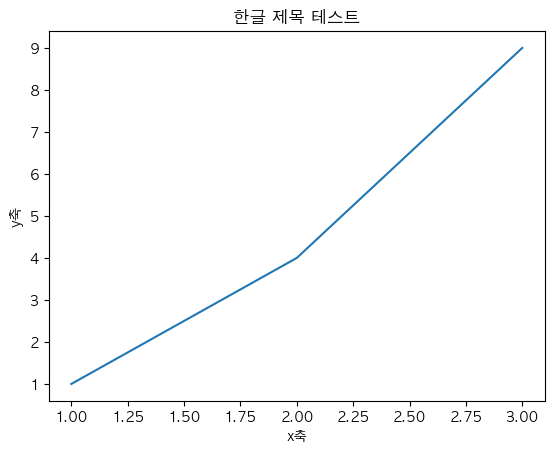

In [3]:
# 한글
plt.rcParams['font.family'] = 'AppleGothic'  # 맥북에서 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False  # 음수 기호 깨짐 방지

plt.plot([1, 2, 3], [1, 4, 9])
plt.title("한글 제목 테스트")
plt.xlabel("x축")
plt.ylabel("y축")
plt.show()

In [4]:
df = pd.read_csv('lending_club_2020_train.csv', low_memory = False)

In [5]:
df.head(10)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,124989905,6000.0,6000.0,6000.000000,36 months,7.97%,187.94,A,A5,Teacher,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,139665484,35000.0,35000.0,35000.000000,60 months,14.47%,822.95,C,C2,Product Specialist,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,84253847,23200.0,23200.0,23200.000000,60 months,24.99%,680.82,E,E4,Production Foreman,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
3,126296074,4500.0,4500.0,4500.000000,36 months,9.93%,145.06,B,B2,Office Manager,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,148913312,15000.0,15000.0,15000.000000,36 months,16.40%,530.33,C,C4,Secretary,...,May-2020,Jul-2020,May-2020,2.0,0.0,ACTIVE,413.83,11025.25,54.62,N
5,119708428,16000.0,16000.0,16000.000000,36 months,7.07%,494.55,A,A2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
6,109906493,4500.0,4500.0,4500.000000,36 months,10.42%,146.10,B,B3,Team Manager,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
7,60286250,20000.0,20000.0,20000.000000,36 months,9.99%,645.25,B,B3,teacher,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
8,151871973,19000.0,19000.0,18999.739941,60 months,17.97%,482.17,D,D1,Manager,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
9,152325146,35000.0,35000.0,35000.000000,36 months,8.19%,1099.85,A,A4,Chief Financial Officer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [7]:
##### 내생변수 제거 기준에 대한 논의 후 반영하면 좋을 듯

endog_vars = [
    'loan_amnt', 'loan_status', 'int_rate', 'installment', 'funded_amnt', 'funded_amnt_inv',
    'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
    'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
    'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'issue_d', 'next_pymnt_d',
    'deferral_term', 'payment_plan_start_date', 'orig_projected_additional_accrued_interest'
]

prefixes = ['disbursement_method', 'hardship_', 'debt_settlement_', 'settlement_']
prefix_matches = [col for col in df.columns if any(col.startswith(p) for p in prefixes)]

triv = ['id', 'url', 'title', 'zip_code']

all_vars_to_remove = endog_vars + prefix_matches + triv

df = df.drop(columns = all_vars_to_remove)

In [8]:
# 결측치 비율 확인
missing_percent = (df.isnull().mean() * 100).round(1)
missing_percent = missing_percent[missing_percent>0]
missing_percent.sort_values(ascending=False)

pd. set_option('display.max_rows', 1000)
print(missing_percent.sort_values(ascending=False))

sec_app_revol_util                    93.3
verification_status_joint             93.3
sec_app_collections_12_mths_ex_med    93.2
sec_app_open_act_il                   93.2
sec_app_mort_acc                      93.2
sec_app_inq_last_6mths                93.2
sec_app_earliest_cr_line              93.2
sec_app_fico_range_high               93.2
sec_app_fico_range_low                93.2
revol_bal_joint                       93.2
sec_app_open_acc                      93.2
sec_app_num_rev_accts                 93.2
sec_app_chargeoff_within_12_mths      93.2
dti_joint                             92.8
annual_inc_joint                      92.8
mths_since_last_record                85.4
mths_since_recent_bc_dlq              77.8
mths_since_last_major_derog           75.3
mths_since_recent_revol_delinq        68.2
mths_since_last_delinq                52.5
il_util                               39.6
mths_since_rcnt_il                    31.7
total_cu_tl                           29.6
inq_last_12

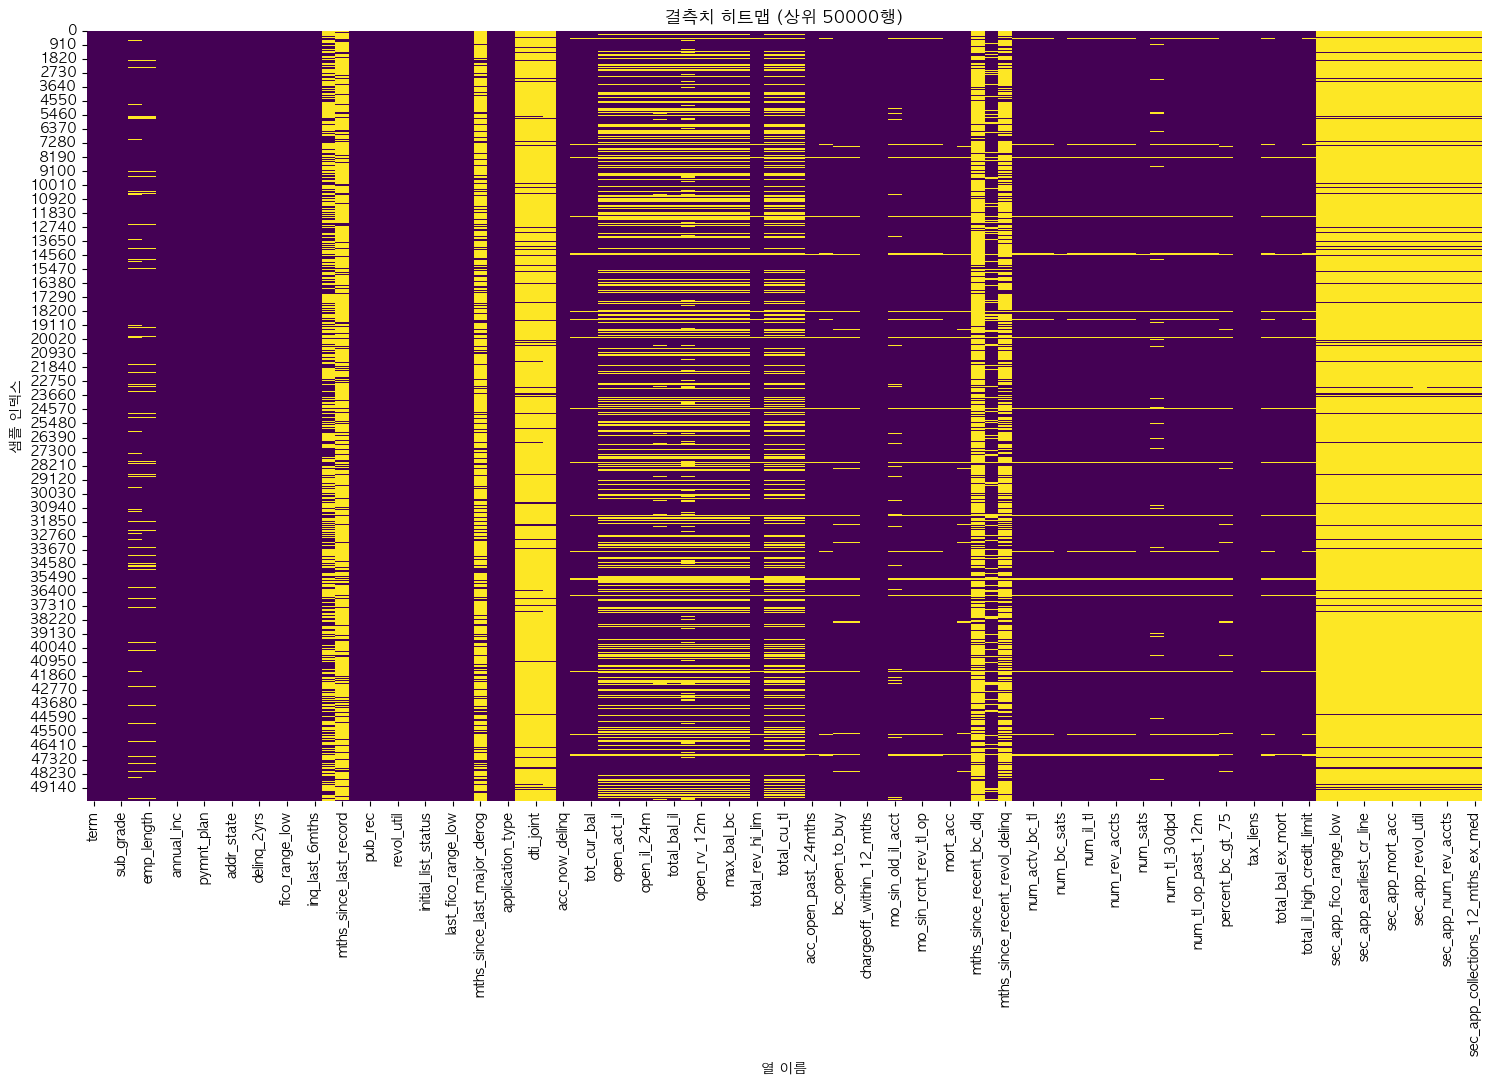

In [9]:
# 결측치 히트맵

# 1. 결측치 있는 열 필터링
missing_cols = df.columns[df.isnull().any()]
df_missing = df[missing_cols]

# 2. 샘플 수가 많으므로 앞쪽 일부 행만 시각화 (너무 많으면 느려져서)
df_sample = df_missing.head(50000) 

# 3. 히트맵 그리기
plt.figure(figsize=(18, 10)) 
sns.heatmap(df_sample.isnull(), cbar=False, cmap='viridis')  
plt.title('결측치 히트맵 (상위 50000행)')
plt.xlabel('열 이름')
plt.ylabel('샘플 인덱스')
plt.show()

In [10]:
# 변수 타입 확인
df.dtypes

term                                   object
grade                                  object
sub_grade                              object
emp_title                              object
emp_length                             object
home_ownership                         object
annual_inc                            float64
verification_status                    object
pymnt_plan                             object
purpose                                object
addr_state                             object
dti                                   float64
delinq_2yrs                           float64
earliest_cr_line                       object
fico_range_low                        float64
fico_range_high                       float64
inq_last_6mths                        float64
mths_since_last_delinq                float64
mths_since_last_record                float64
open_acc                              float64
pub_rec                               float64
revol_bal                         

In [15]:
# dtype = object인 cols만 모아서 살펴보기
object_cols = df.select_dtypes(include = "object").columns

for col in object_cols:
    print(f"변수명: {col}")
    print(f"고유값 수: {df[col].nunique()}")
    print(f"상위고유값: \n{df[col].value_counts(dropna=False).head(5)}\n")

변수명: term
고유값 수: 2
상위고유값: 
term
 36 months    1236014
 60 months     519280
NaN                 1
Name: count, dtype: int64

변수명: grade
고유값 수: 7
상위고유값: 
grade
B    515082
C    481313
A    393726
D    249328
E     83213
Name: count, dtype: int64

변수명: sub_grade
고유값 수: 35
상위고유값: 
sub_grade
B4    111180
B5    109061
C1    107476
B2     98986
B1     98265
Name: count, dtype: int64

변수명: emp_title
고유값 수: 404167
상위고유값: 
emp_title
NaN                 158401
Teacher              30092
Manager              26280
Owner                14836
Registered Nurse     12397
Name: count, dtype: int64

변수명: emp_length
고유값 수: 11
상위고유값: 
emp_length
10+ years    567404
< 1 year     163172
2 years      157620
3 years      139554
NaN          123085
Name: count, dtype: int64

변수명: home_ownership
고유값 수: 6
상위고유값: 
home_ownership
MORTGAGE    862836
RENT        692146
OWN         198018
ANY           2150
OTHER          113
Name: count, dtype: int64

변수명: verification_status
고유값 수: 3
상위고유값: 
verification_status
So

In [17]:
#dtype = object인 cols 요약 테이블
summary = []

for col in object_cols:
    unique_vals = df[col].dropna().unique()
    summary.append({
        '변수명': col,
        '고유값 수': df[col].nunique(),
        '예시 (앞 10개)': unique_vals[:10]
    })

pd.DataFrame(summary)

,변수명,고유값 수,예시 (앞 10개)
0,term,2,"[ 36 months, 60 months]"
1,grade,7,"[A, C, E, B, D, G, F]"
2,sub_grade,35,"[A5, C2, E4, B2, C4, A2, B3, D1, A4, B5]"
3,emp_title,404167,"[Teacher, Product Specialist, Production Forem..."
4,emp_length,11,"[2 years, 10+ years, 5 years, 1 year, 4 years,..."
5,home_ownership,6,"[MORTGAGE, RENT, OWN, ANY, OTHER, NONE]"
6,verification_status,3,"[Verified, Source Verified, Not Verified]"
7,pymnt_plan,1,[n]
8,purpose,14,"[debt_consolidation, credit_card, home_improve..."
9,addr_state,51,"[MN, NJ, OK, FL, NC, TX, IL, KY, WA, AZ]"


### 아직 전처리가 안 들어간 상황
### 실제로는 실수 값이지만 문자열로 들어간 열들(e.g. emp_length;근속연수, term;대출년수)은
### 이하의 수치형 변수 분석에 들어가지 않은 상태입니다.

In [32]:
# 전처리 코드

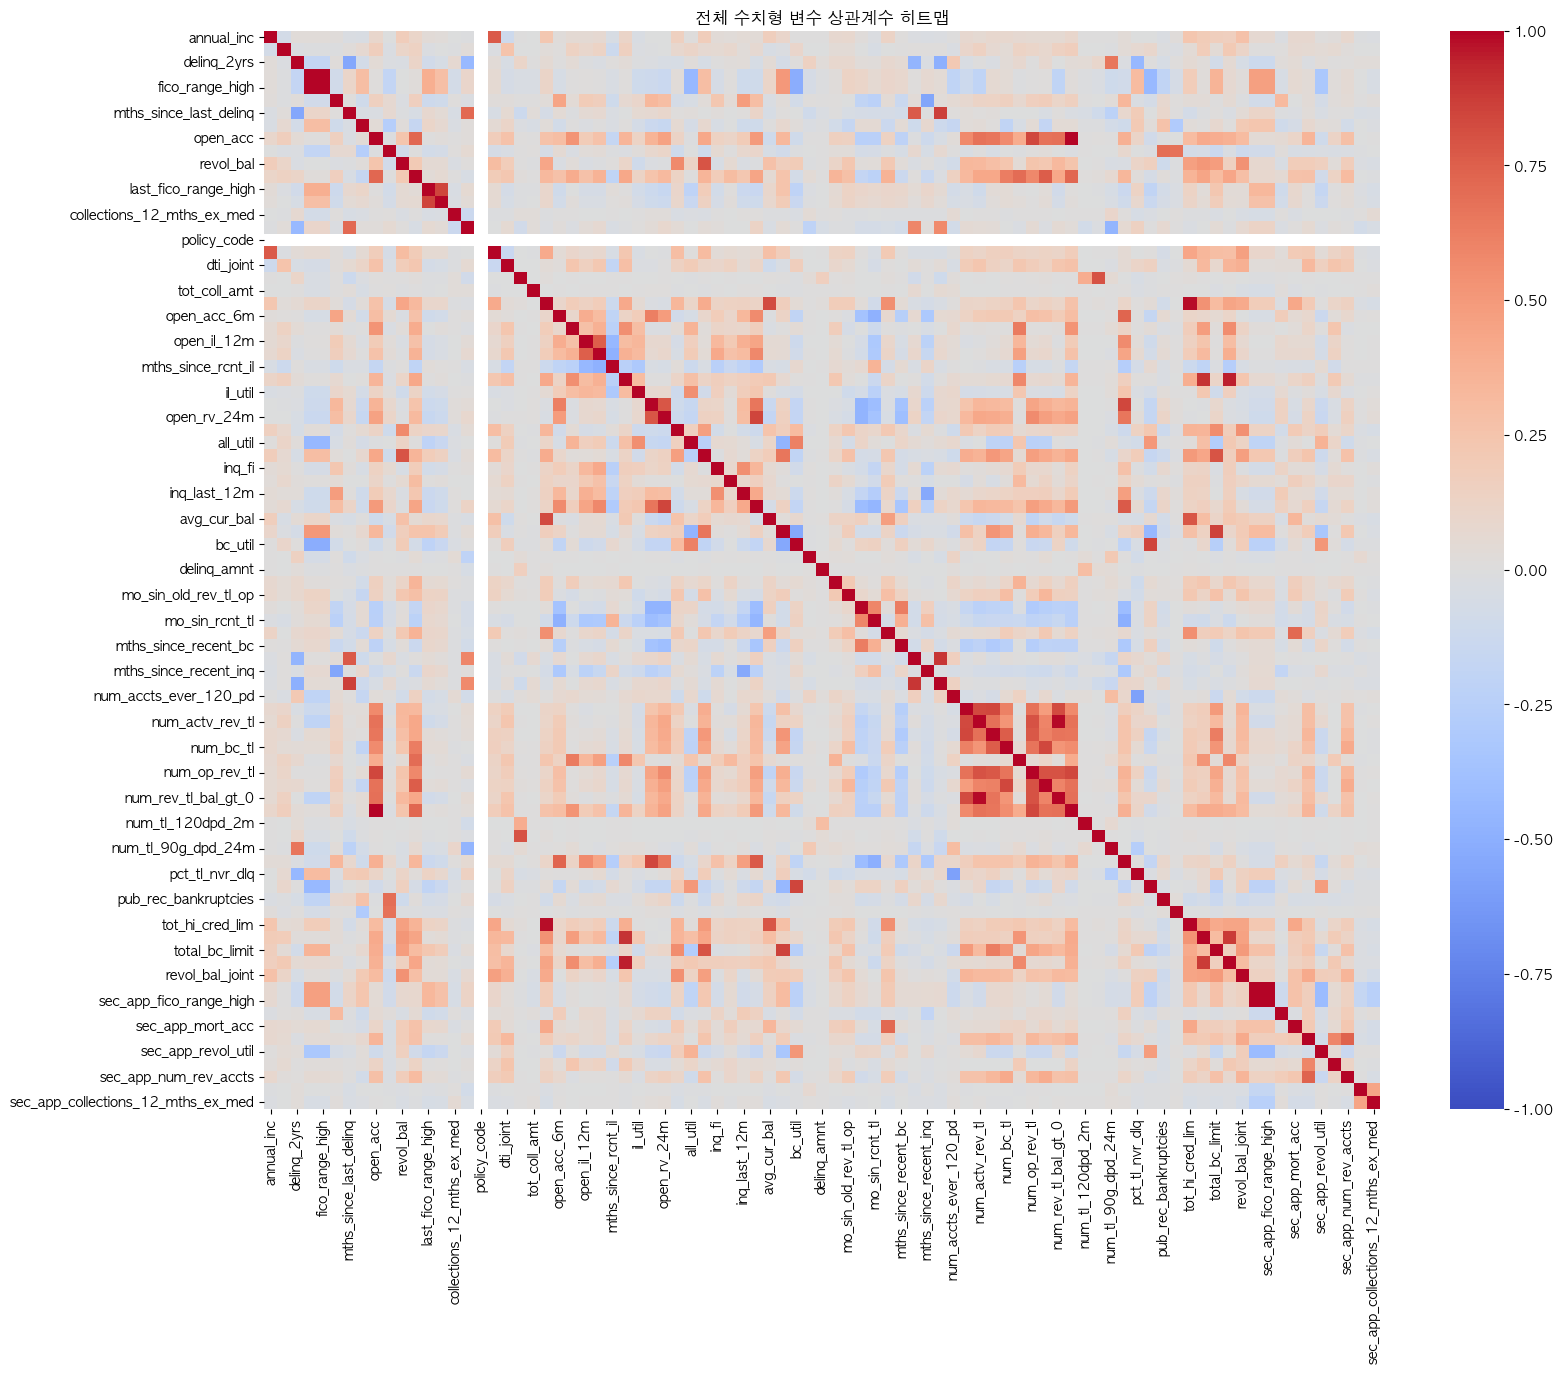

In [11]:
# 수치형 변수 간 상관관계 히트맵
num_cols = df.select_dtypes(include = 'number').columns
plt.figure(figsize=(18, 14))
sns.heatmap(df[num_cols].corr(), cmap='coolwarm', vmin =- 1, vmax=1)
plt.title('전체 수치형 변수 상관계수 히트맵')
plt.show()

In [12]:
# 수치형 변수들 중 상관관계 높은 변수들 확인 

# 1. 상관계수 계산
num_df = df.select_dtypes(include = "number")
corr_matrix = num_df.corr().abs()

# 2. 상삼각행렬에서 중복 제거
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
upper_triangle = corr_matrix.where(mask)

# 3. 상관계수를 시리즈 형태로 변환하여 정렬
sorted_pairs = (
    upper_triangle.stack()
    .sort_values(ascending=False)
    .reset_index()
)

# 4. 칼럼 이름 변경
sorted_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

# 5. 상위 90쌍 출력
top_90_pairs = sorted_pairs.head(90)
print(top_90_pairs)

                     Variable 1                      Variable 2  Correlation
0        sec_app_fico_range_low         sec_app_fico_range_high     1.000000
1                fico_range_low                 fico_range_high     1.000000
2                      open_acc                        num_sats     0.999145
3               num_actv_rev_tl             num_rev_tl_bal_gt_0     0.986298
4                   tot_cur_bal                 tot_hi_cred_lim     0.976572
5                  total_bal_il      total_il_high_credit_limit     0.949519
6                  total_bal_il               total_bal_ex_mort     0.903279
7      mths_since_recent_bc_dlq  mths_since_recent_revol_delinq     0.892067
8             total_bal_ex_mort      total_il_high_credit_limit     0.882370
9        mths_since_last_delinq  mths_since_recent_revol_delinq     0.864612
10               bc_open_to_buy                  total_bc_limit     0.852414
11                      bc_util                percent_bc_gt_75     0.847593

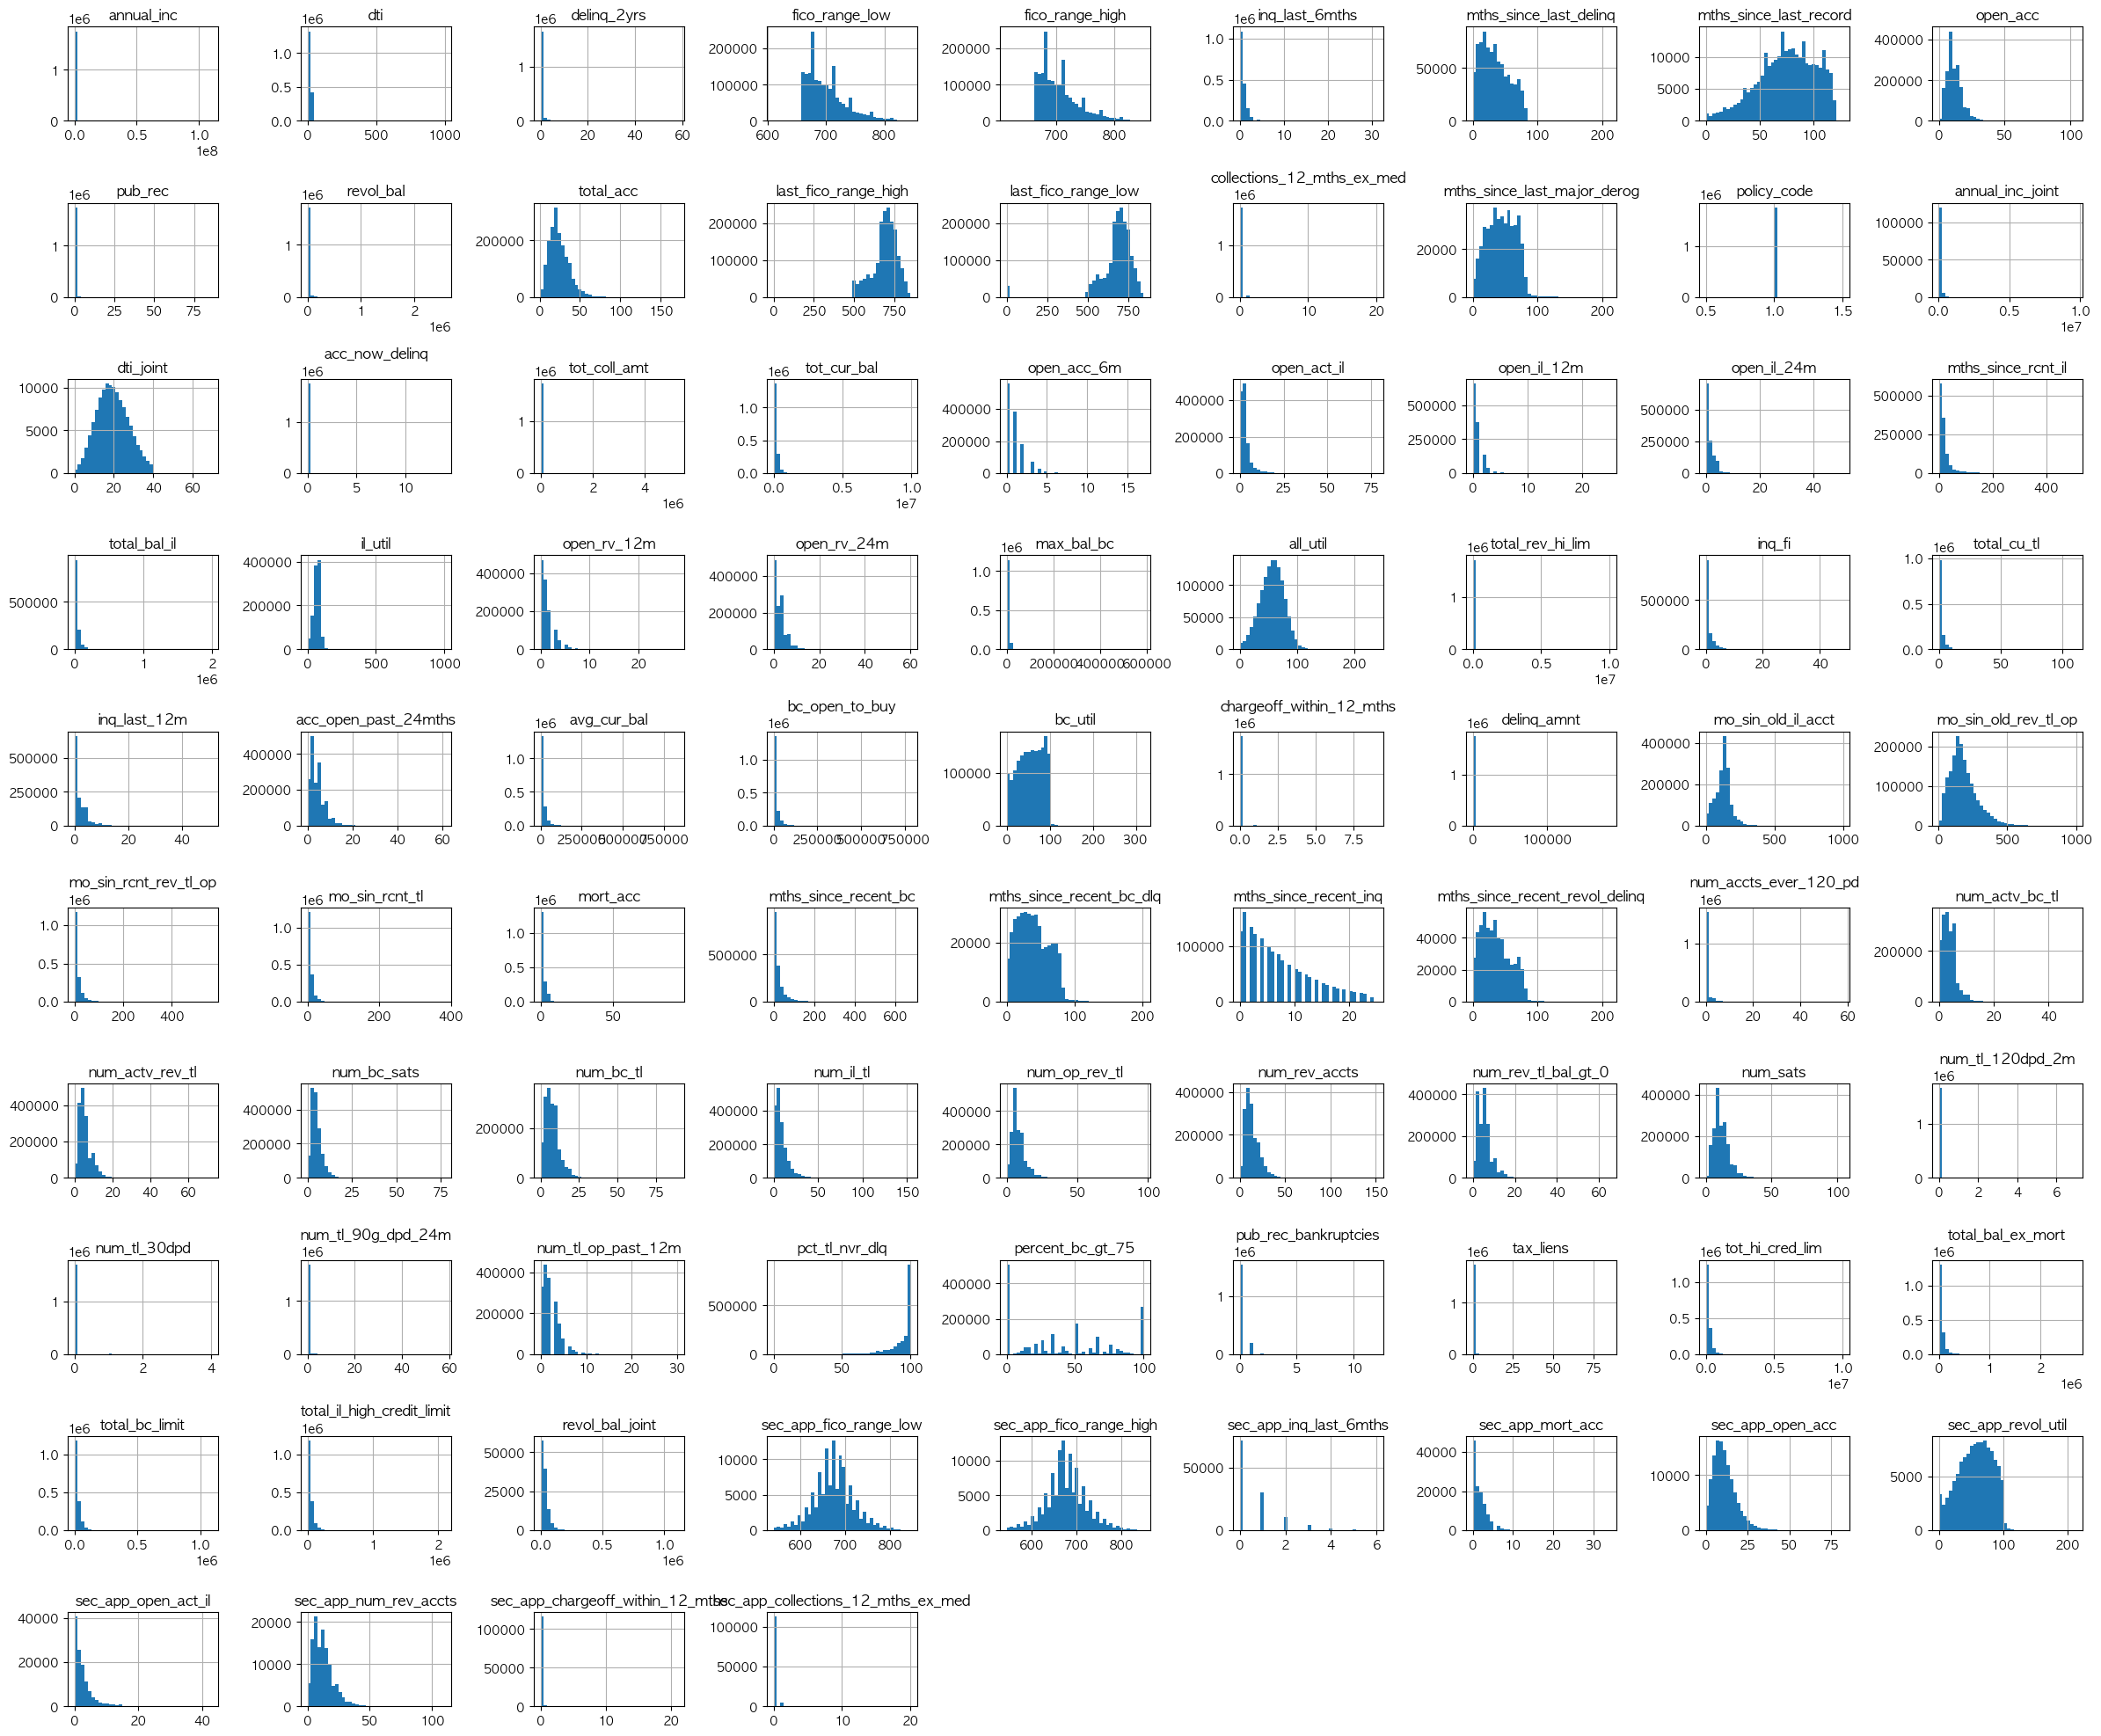

In [13]:
# 수치형 변수 전체 히스토그램
df[num_cols].hist(figsize=(24, 20), bins =40)
plt.tight_layout()
plt.show()